# **Simple Imputer**

`SimpleImputer` is a class from `sklearn.impute` used for handling missing values in datasets by replacing them with a specified fill value. It is a univariate imputation method, meaning it imputes values in the i-th feature dimension using only non-missing values in that same feature dimension.
## **Key Strategies**
The `strategy` parameter determines how the missing values are filled:
1.  **`mean`**: Replaces missing values using the mean along each column. Can only be used with numeric data.
2.  **`median`**: Replaces missing values using the median along each column. Can only be used with numeric data.
3.  **`most_frequent`**: Replaces missing using the most frequent value (mode) along each column. Can be used with strings or numeric data.
4.  **`constant`**: Replaces missing values with fill_value. Can be used with strings or numeric data.
## **When to use?**
-   **Mean/Median**: When data is numerical and missing at random. Median is robust to outliers.
-   **Most Frequent**: When data is categorical or numerical with a clear mode.
-   **Constant**: When you want to flag missing values with a specific placeholder (e.g., -1 or "Missing").
## **Basic Usage**
```python
from sklearn.impute import SimpleImputer
import numpy as np
# Example data with missing values
X = [[1, 2], [np.nan, 3], [7, 6]]
# Create an imputer object with a strategy
imputer = SimpleImputer(strategy='mean')
# Fit and transform the data
X_imputed = imputer.fit_transform(X)
```

## **When to use ???**
2 ways to do so
1. Univariate Imputation
    - filling the values by using the mean, median, or most frequent value
2. Multivariate Imputation
    - filling the values by using the mean, median, or most frequent value
    - it also has two methods
        1. KNN imputer
        2. Iterative imputer


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# if your data is normally skewed use 'mean'
# if your data is even a little bit of skewed use 'median', if you use mean here then your mean will shift

# imputer is easy to use but, it changes the distribution of the data as you replace the missing values with mean or median
# affects the correlation btwn the features
# use it when data is missing at random, and less (below 5%)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['family'] = df['SibSp']+df['Parch']
df = df.drop(columns=['SibSp','Parch'])
df = df[['Age', 'Fare', 'family', 'Survived']]
df.head()


,Age,Fare,family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
print(df.isna().sum(), '\n')
print(df.isna().mean()*100)     # 19 % data missing in Age

Age         177
Fare          0
family        0
Survived      0
dtype: int64 

Age         19.86532
Fare         0.00000
family       0.00000
Survived     0.00000
dtype: float64


## **Using Pandas for Imputation**
*(not recommended, for eductional purposes only)*

In [5]:
x = df.drop(columns=['Survived'])
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape)
print(f"\nNull values in x_train: \n{x_train.isna().mean()*100}")

# mean age
mean_age = x_train['Age'].mean()
x_train['age_mean'] = x_train['Age'].fillna(mean_age)

# median age
median_age = x_train['Age'].median()
x_train['age_median'] = x_train['Age'].fillna(median_age)

x_train.sample(5)



(712, 3) (179, 3)

Null values in x_train: 
Age       19.662921
Fare       0.000000
family     0.000000
dtype: float64


,Age,Fare,family,age_mean,age_median
157,30.0,8.050,0,30.000000,30.0
183,1.0,39.000,3,1.000000,1.0
17,NaN,13.000,0,29.498846,28.0
243,22.0,7.125,0,22.000000,22.0
228,18.0,13.000,0,18.000000,18.0


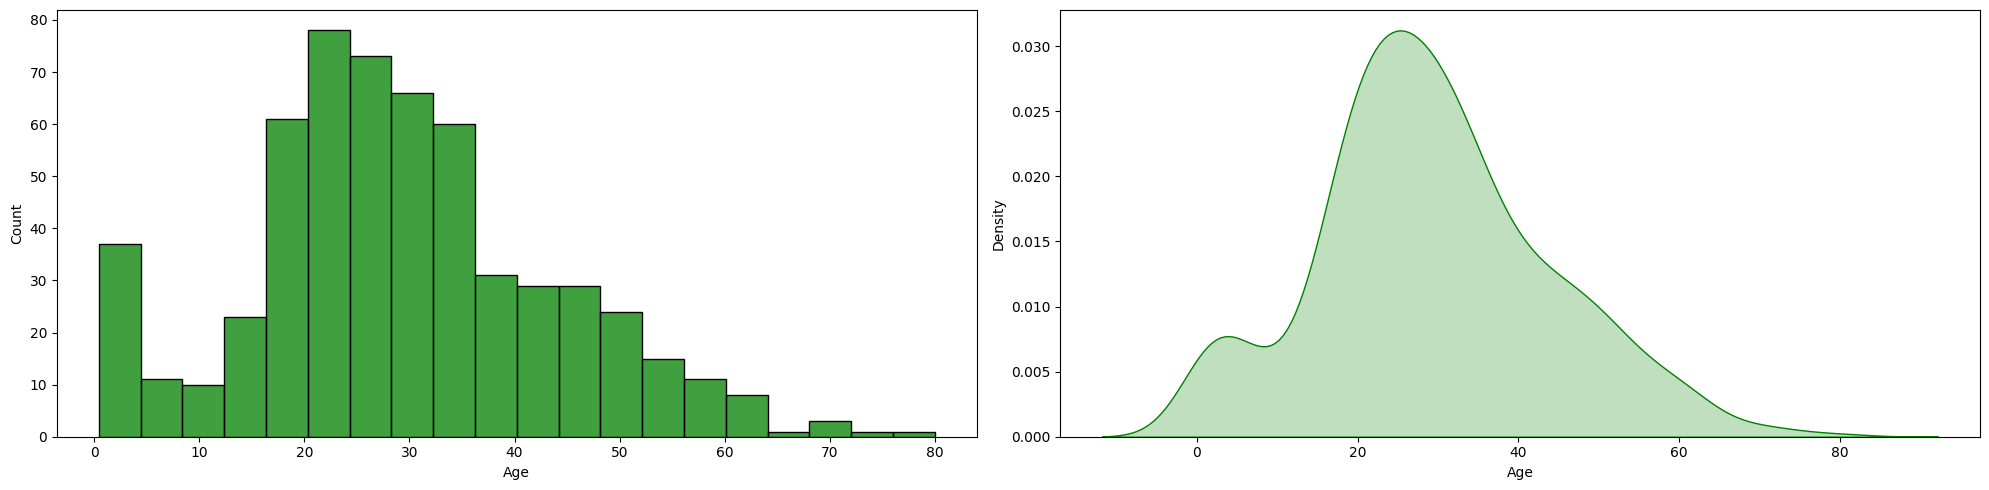

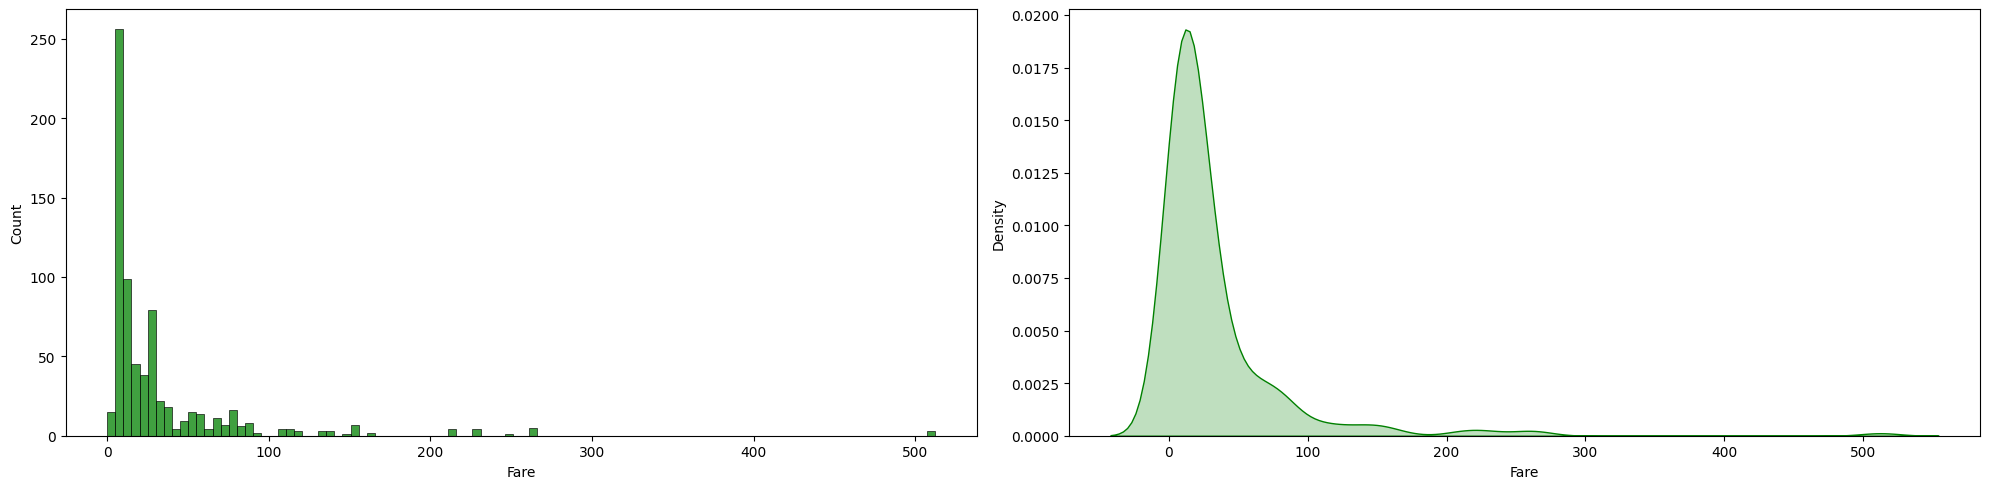

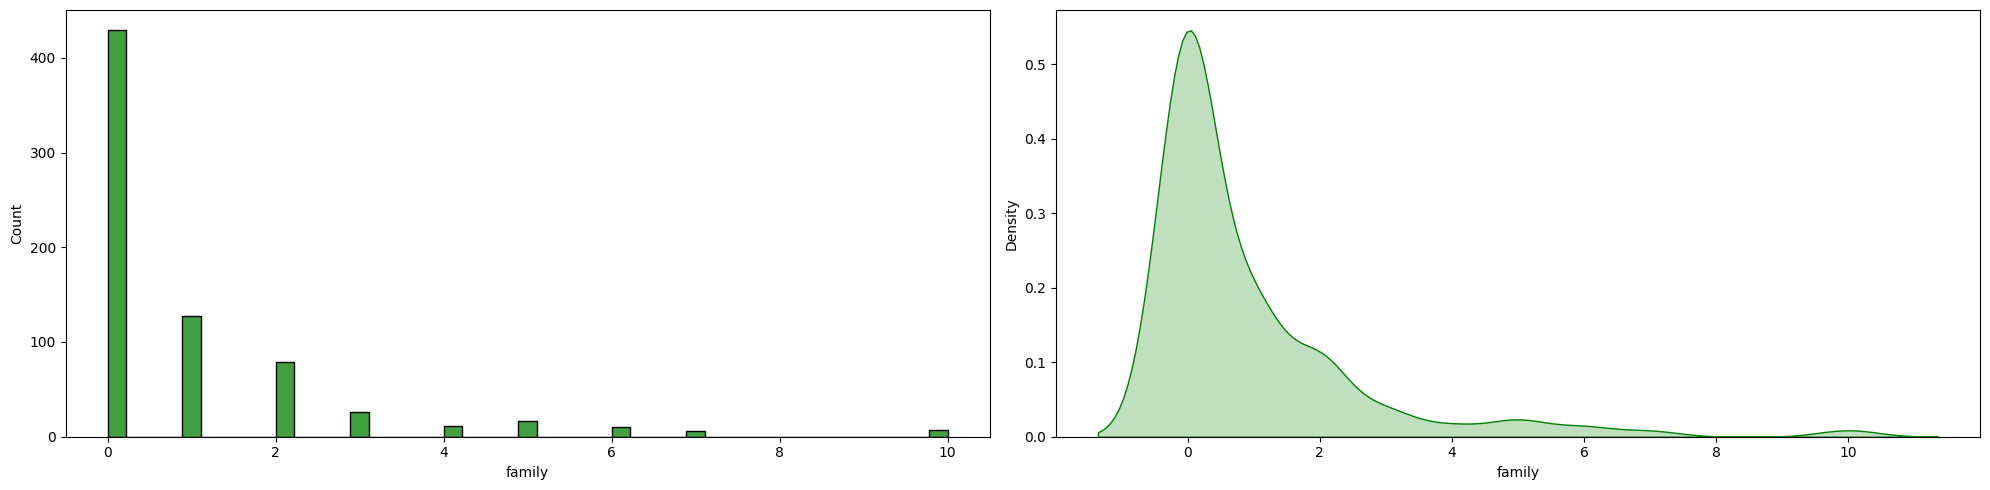

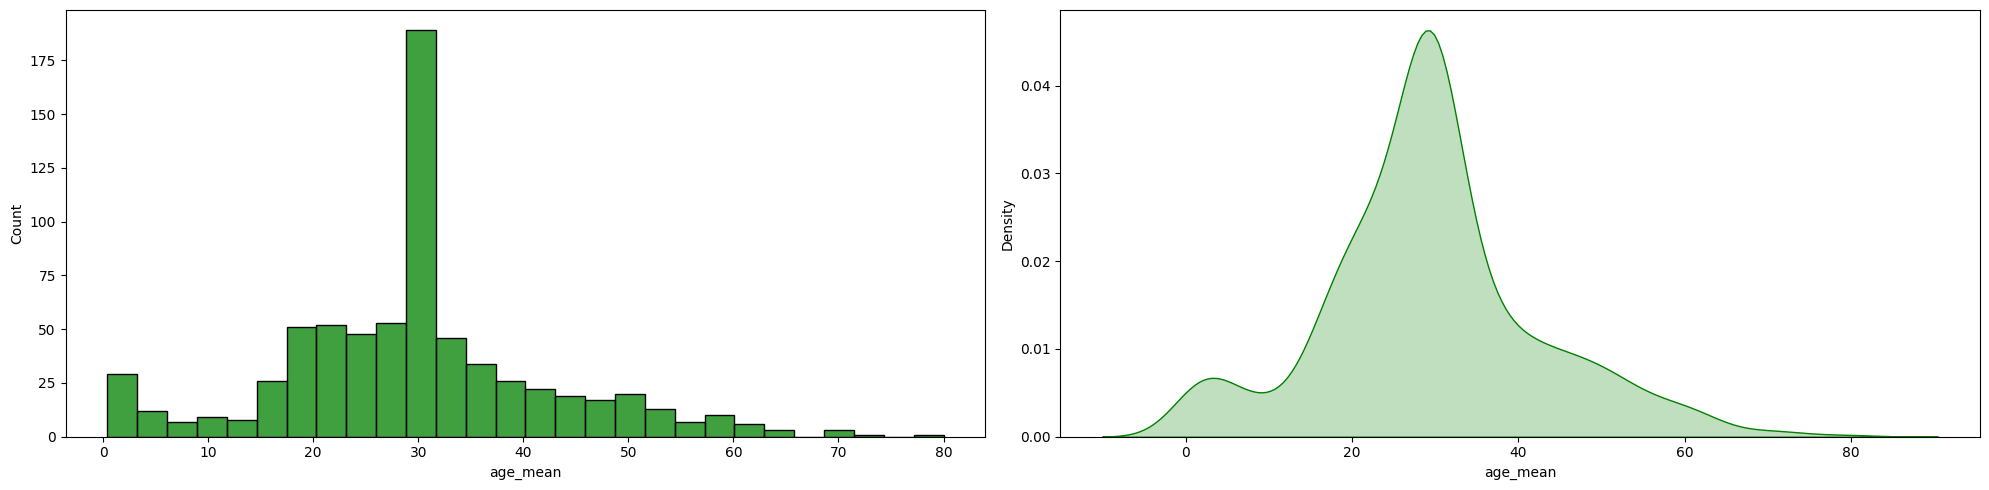

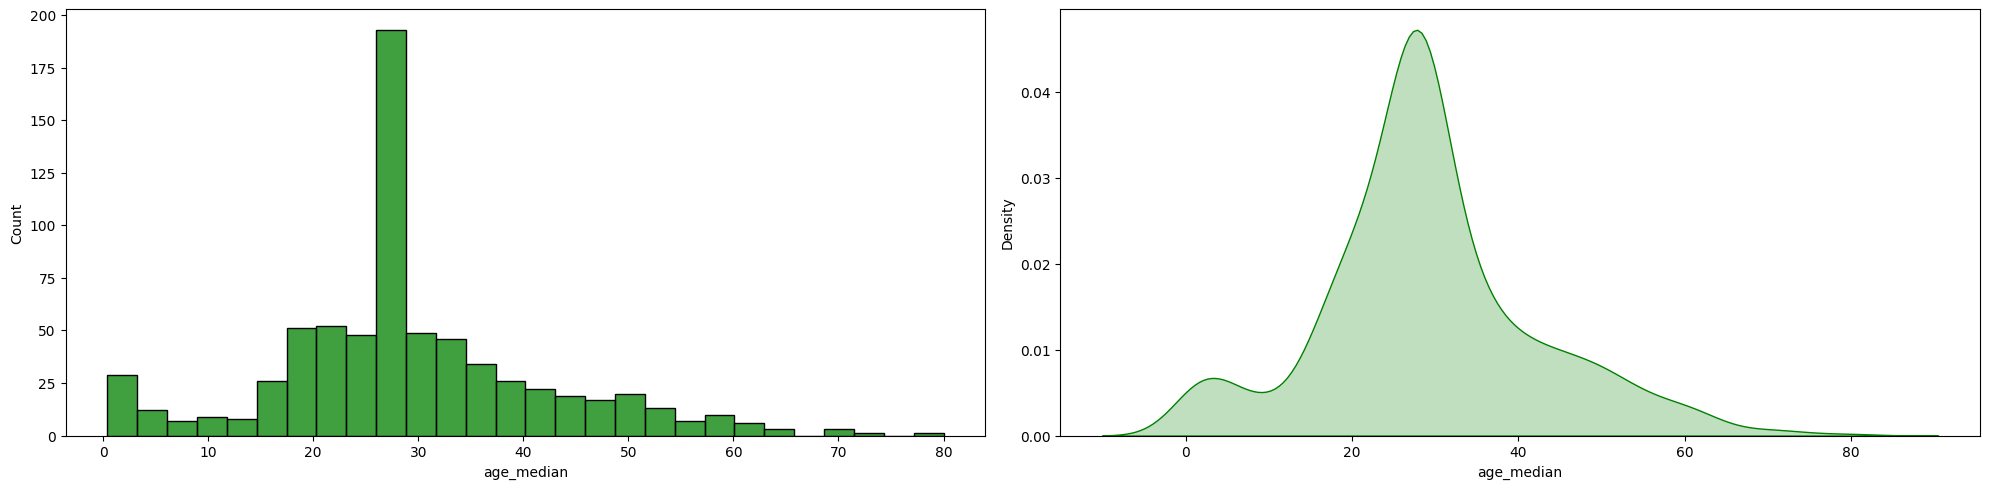

In [6]:
cols = x_train.columns
for i in range(0, len(cols)):

    plt.figure(figsize=(20, 5))

    plt.subplot(121)
    sns.histplot(x_train[cols[i]], color='g')

    plt.subplot(122)
    sns.kdeplot(x_train[cols[i]], fill=True, color='g')

    plt.tight_layout()
    plt.show()


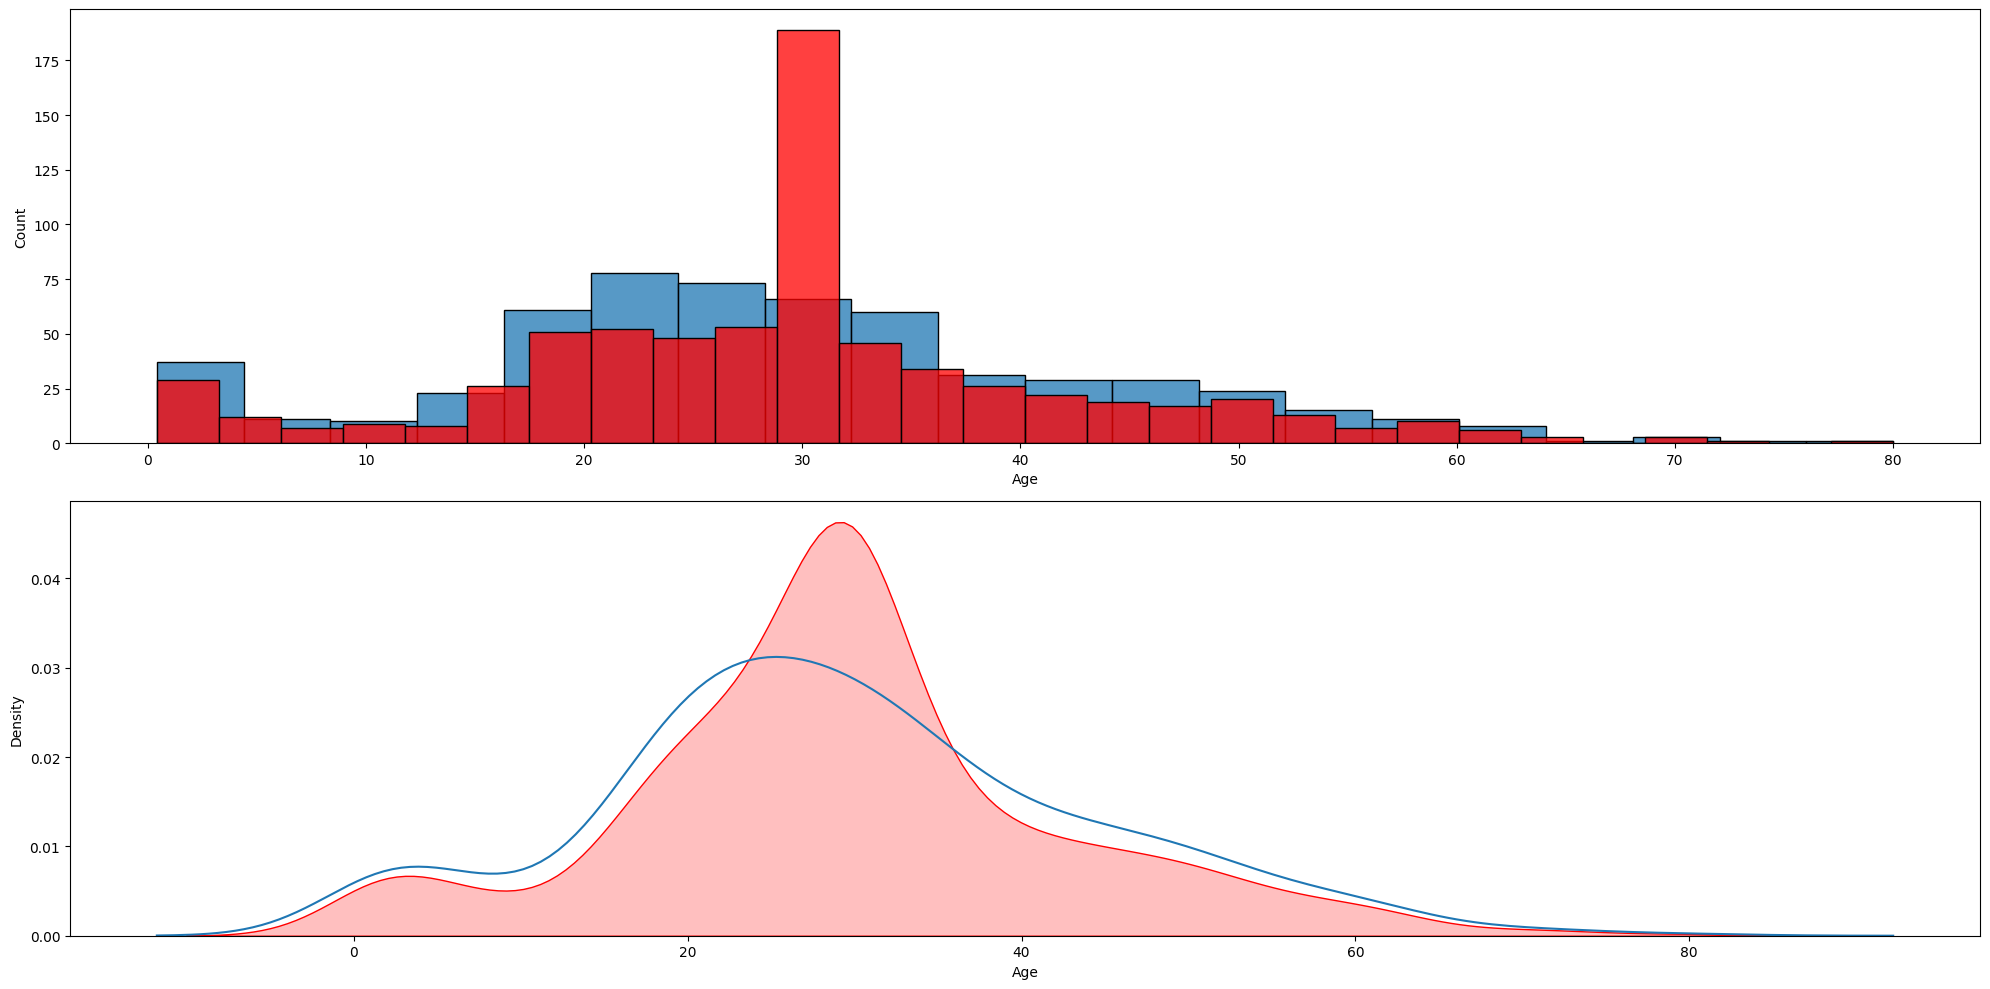

In [7]:
plt.figure(figsize=(20, 10))

plt.subplot(211)
sns.histplot(x_train['Age'])
sns.histplot(x_train['age_mean'], fill=True, color='r')

plt.subplot(212)
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['age_mean'], fill=True, color='r')

plt.tight_layout()
plt.show()

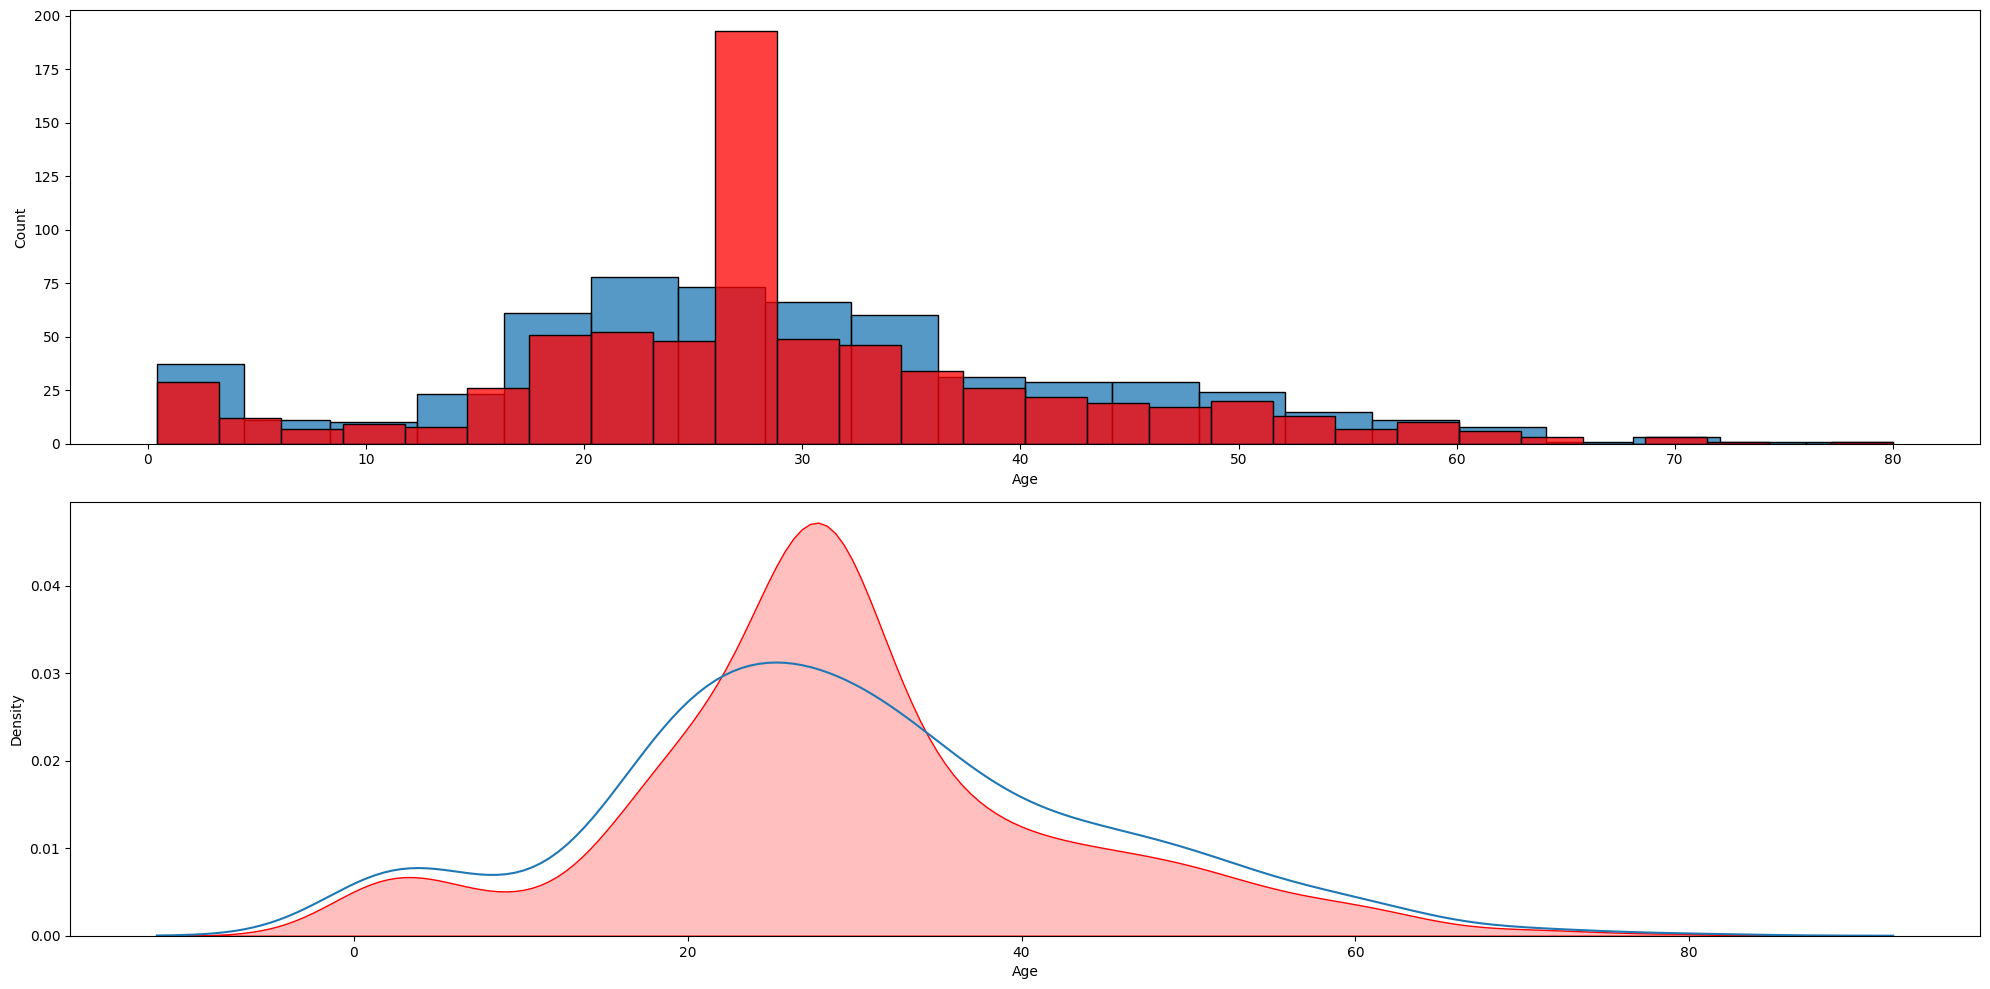

In [8]:
plt.figure(figsize=(20, 10))

plt.subplot(211)
sns.histplot(x_train['Age'])
sns.histplot(x_train['age_median'], fill=True, color='r')

plt.subplot(212)
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['age_median'], fill=True, color='r')

plt.tight_layout()
plt.show()

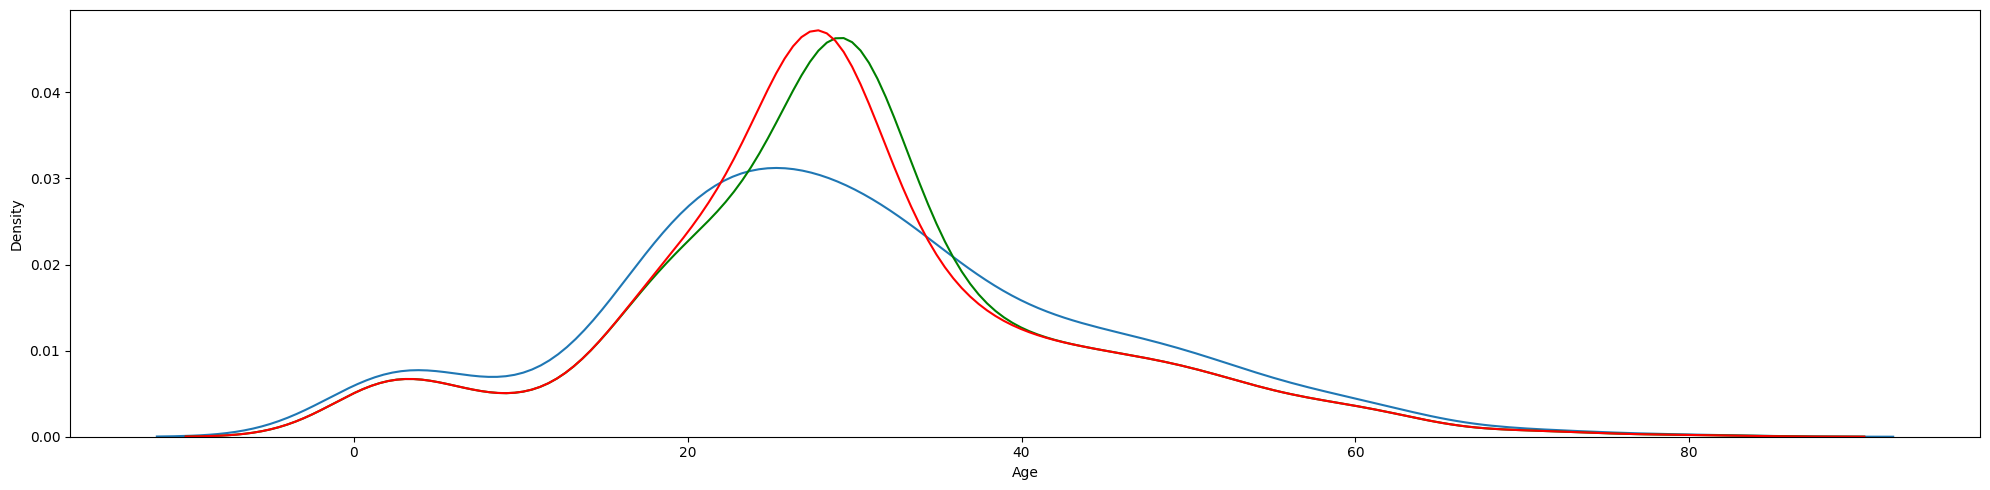

In [9]:
plt.figure(figsize=(20, 5))

sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['age_mean'], color='g')
sns.kdeplot(x_train['age_median'], color='r')

plt.tight_layout()
plt.show()

# now you can see the variance btwn age, mean age, and median age

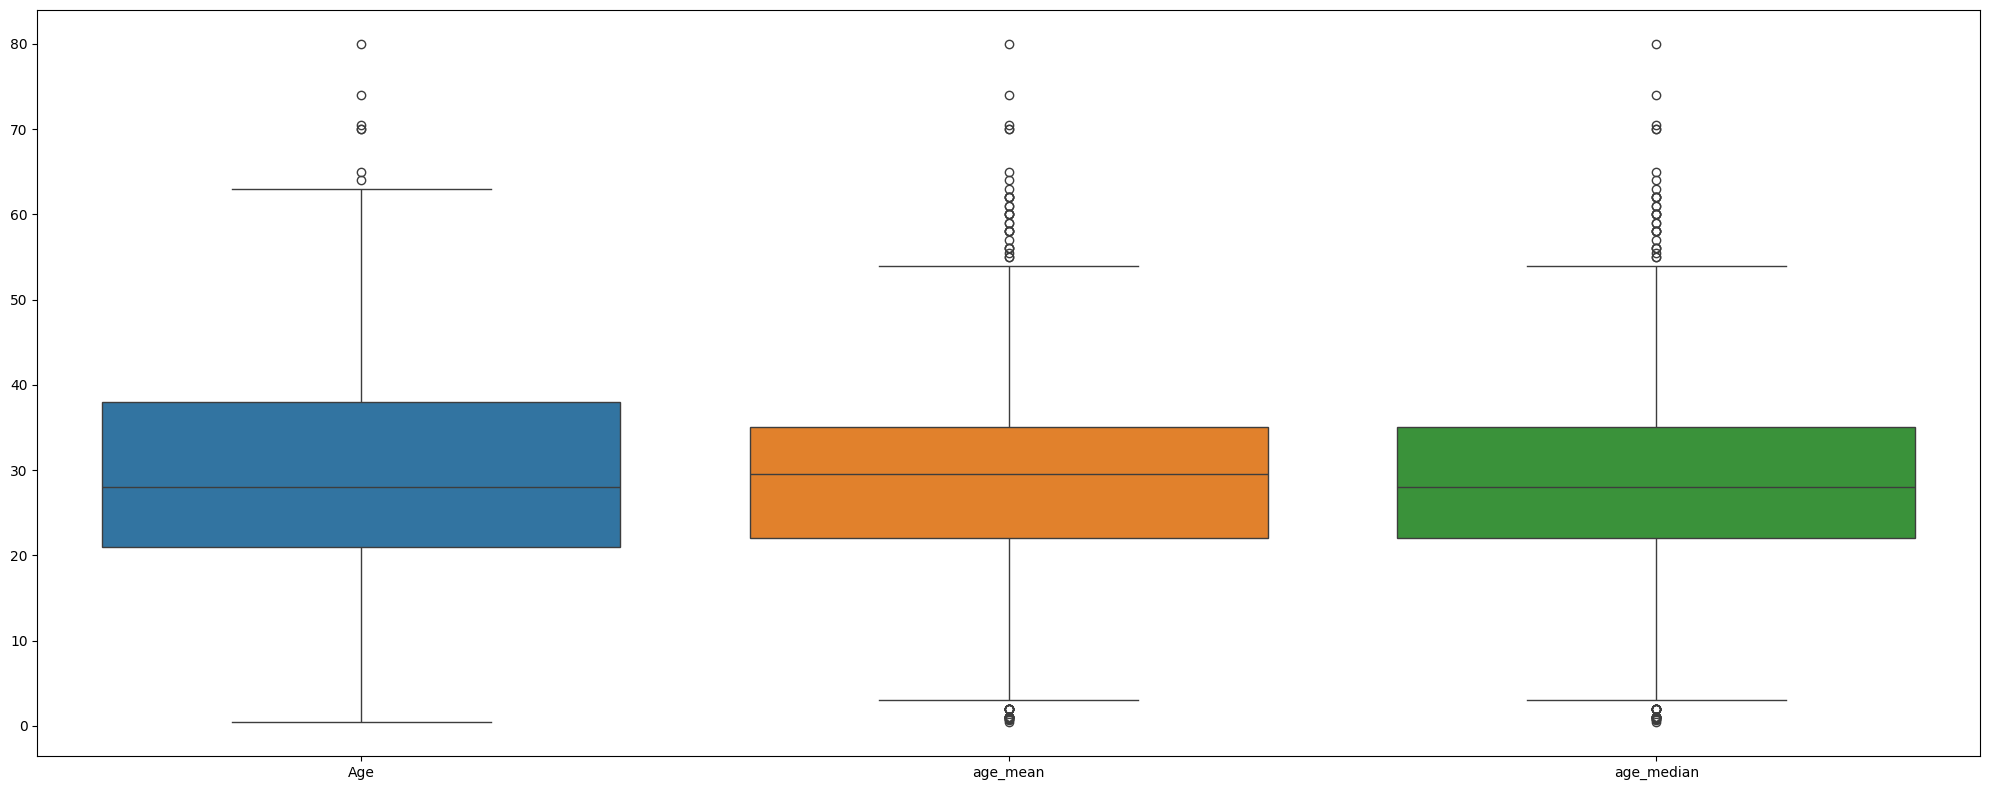

In [10]:
plt.figure(figsize=(20, 8))
sns.boxplot(x_train[['Age', 'age_mean', 'age_median']])

plt.tight_layout()
plt.show()

# as we can see there is increase in outliers after imputation

In [11]:
"""
High variance is not good or bad by itself — it depends on the model and the context.

What High Variance Means:
- Values are spread out widely.
- The feature has a large range.
- The feature contains more information and variation.

When High Variance is GOOD:
- Useful for models that can handle raw differences.
- Good for Decision Trees, Random Forest, XGBoost.
- Good for Linear Regression and Logistic Regression (after scaling).
- Good for Neural Networks (after scaling).
High variance means the feature changes a lot → the model can learn more patterns.

When is High Variance BAD:
1. If the feature scale is much bigger than others.
   Example: Age variance = 210, Fare variance = 2700.
   Then distance-based models like KNN, SVM, K-means, Neural Networks get confused.
   → You must scale the features (StandardScaler or MinMaxScaler).

2. If caused by outliers.
   If a few extreme values make variance huge, then it is bad.
   → Remove or cap outliers.

Summary Table:
- High variance (GOOD): gives more learning signal.
- High variance (BAD): caused by outliers or not scaled for distance-based models.
- Low variance (GOOD): feature is stable.
- Low variance (BAD): near-zero variance → feature gives no information and should be removed.

Simple Rule:
High variance is useful, but must be scaled for distance-based ML models.
"""

x_train.var()       # printing variance

Age            210.251707
Fare          2700.831981
family           2.830892
age_mean       168.851934
age_median     169.207310
dtype: float64

In [12]:
x_train.cov()       # printing covariance
# each feature showing covariance with every other feature
# higher the covariance, stronger the relationsip 

,Age,Fare,family,age_mean,age_median
Age,210.251707,71.580633,-6.993325,210.251707,210.251707
Fare,71.580633,2700.831981,18.495747,57.485994,61.261919
family,-6.993325,18.495747,2.830892,-5.616299,-5.587710
age_mean,210.251707,57.485994,-5.616299,168.851934,168.851934
age_median,210.251707,61.261919,-5.587710,168.851934,169.207310


In [13]:
x_train.corr()

,Age,Fare,family,age_mean,age_median
Age,1.000000,0.088103,-0.319651,1.000000,1.000000
Fare,0.088103,1.000000,0.211525,0.085126,0.090622
family,-0.319651,0.211525,1.000000,-0.256883,-0.255307
age_mean,1.000000,0.085126,-0.256883,1.000000,0.998949
age_median,1.000000,0.090622,-0.255307,0.998949,1.000000


## **Covariance vs Correlation**

### 1. **Meaning**
- **Covariance (`cov()`)** → Shows whether two variables move together (direction only).
- **Correlation (`corr()`)** → Shows how strongly two variables move together (direction + strength).
- Covariance **depends on units** (rupees, kg, cm → big numbers).
- Correlation **removes units and standardizes the result**.


### 2. **Range**
| Measure | Range |
|--------|--------|
| **Covariance** | – ∞ to +∞ |
| **Correlation** | – 1 to +1 |


### 3. **Unit Dependence**
- **Covariance** → Depends on units (scale-dependent).  
  Example: Salary in ₹ vs LPA changes covariance size.
- **Correlation** → Unit-free. Standardized.


### 4. **Interpretability**
- **Covariance** → Hard to interpret (values can be very large/small).
- **Correlation** → Easy to interpret (always between –1 and +1).



### 6. **Outputs in Pandas**

#### **`x_train.cov()`**
- Returns covariance matrix  
- Diagonal = variance  
- Off-diagonal = covariance between variables  

#### **`x_train.corr()`**
- Returns correlation matrix  
- Diagonal = 1  
- Off-diagonal = values between –1 and +1  
- Shows strength + direction of relationship  


### 7. **Practical Use in ML**

| Purpose | Covariance | Correlation |
|---------|------------|-------------|
| Check data spread | ✔ Yes | ❌ No |
| Detect multicollinearity | ❌ No | ✔ Yes |
| Feature selection | ❌ Rare | ✔ Common |
| Scale independent | ❌ No | ✔ Yes |





## **Using Sklearn for imputation**
*(highly recommended)*

In [14]:
df['age_mean'] = df['Age']
df['age_median'] = df['Age']

x = df.drop(columns=['Survived'])
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')


trf = ColumnTransformer([
    ('a1', mean_imputer, ['age_mean']),
    ('a2', median_imputer, ['age_median']),
], remainder='passthrough')


x_train_trf = pd.DataFrame(trf.fit_transform(x_train), columns=x.columns)
x_train_trf.sample(5)

,Age,Fare,family,age_mean,age_median
657,19.000000,19.0,19.0,7.8958,0.0
5,24.000000,24.0,24.0,247.5208,1.0
352,29.498846,28.0,NaN,30.0000,0.0
219,27.000000,27.0,27.0,26.0000,0.0
525,25.000000,25.0,25.0,26.0000,1.0


In [15]:
print(x_train_trf['age_median'].unique())
print(x_train_trf['age_median'].nunique())

[ 0.  1.  6.  2.  3.  4.  5.  7. 10.]
9


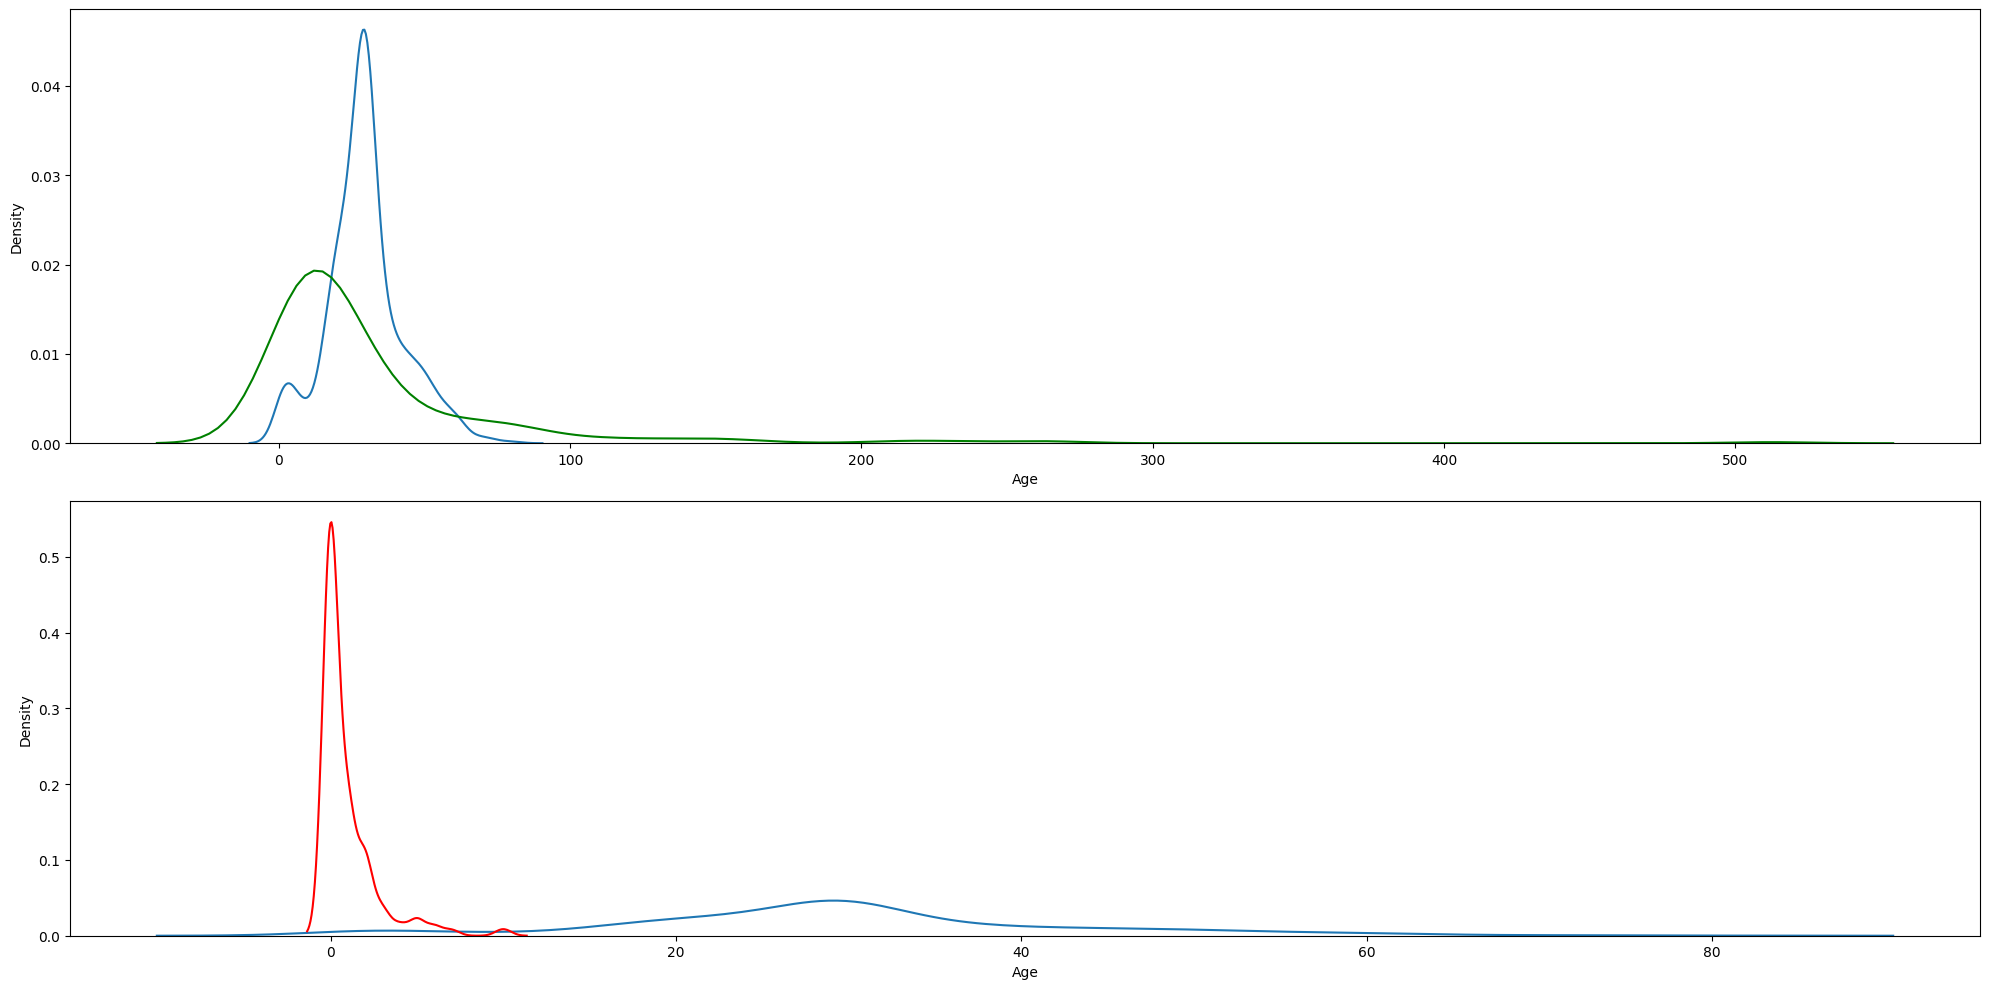

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(211)
sns.kdeplot(x_train_trf['Age'])
sns.kdeplot(x_train_trf['age_mean'], color='g')

plt.subplot(212)
sns.kdeplot(x_train_trf['Age'])
sns.kdeplot(x_train_trf['age_median'], color='r')

plt.tight_layout()
plt.show()

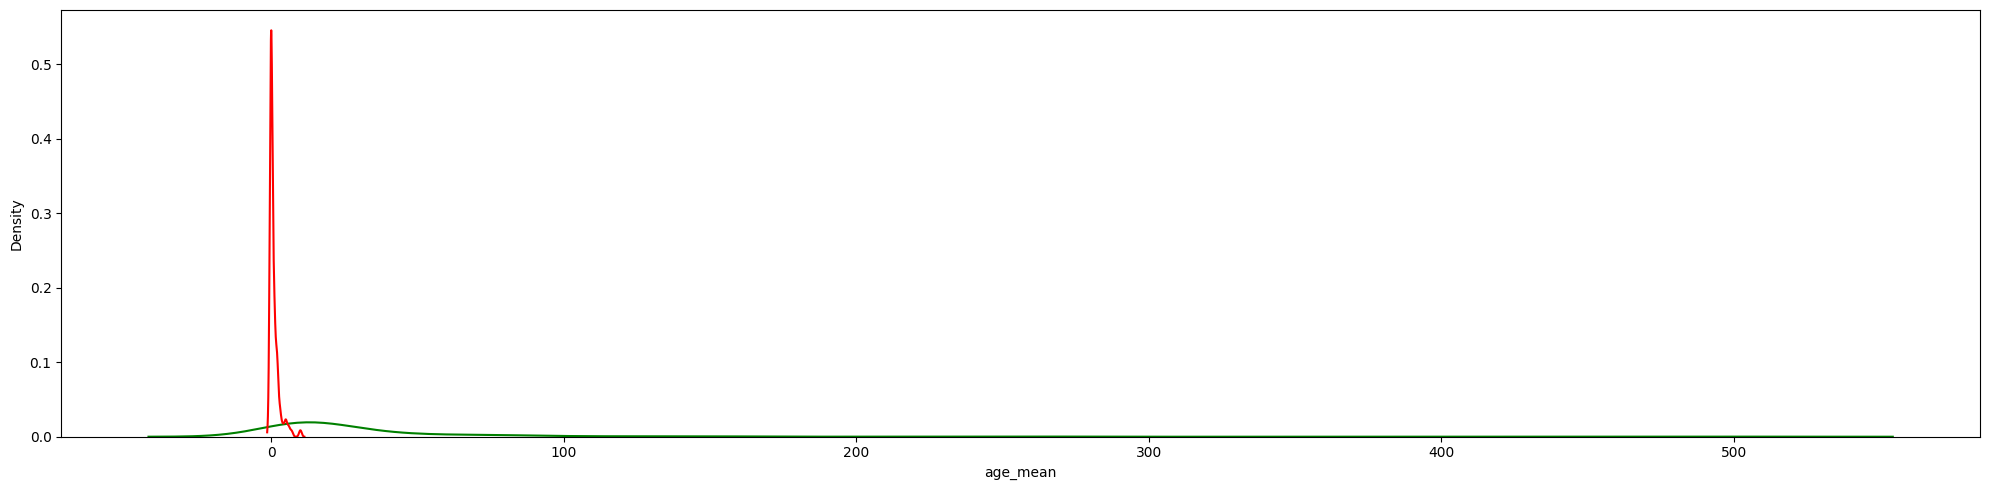

In [17]:
plt.figure(figsize=(20, 5))

sns.kdeplot(x_train_trf['age_mean'], color='g')
sns.kdeplot(x_train_trf['age_median'], color='r')

plt.tight_layout()
plt.show()

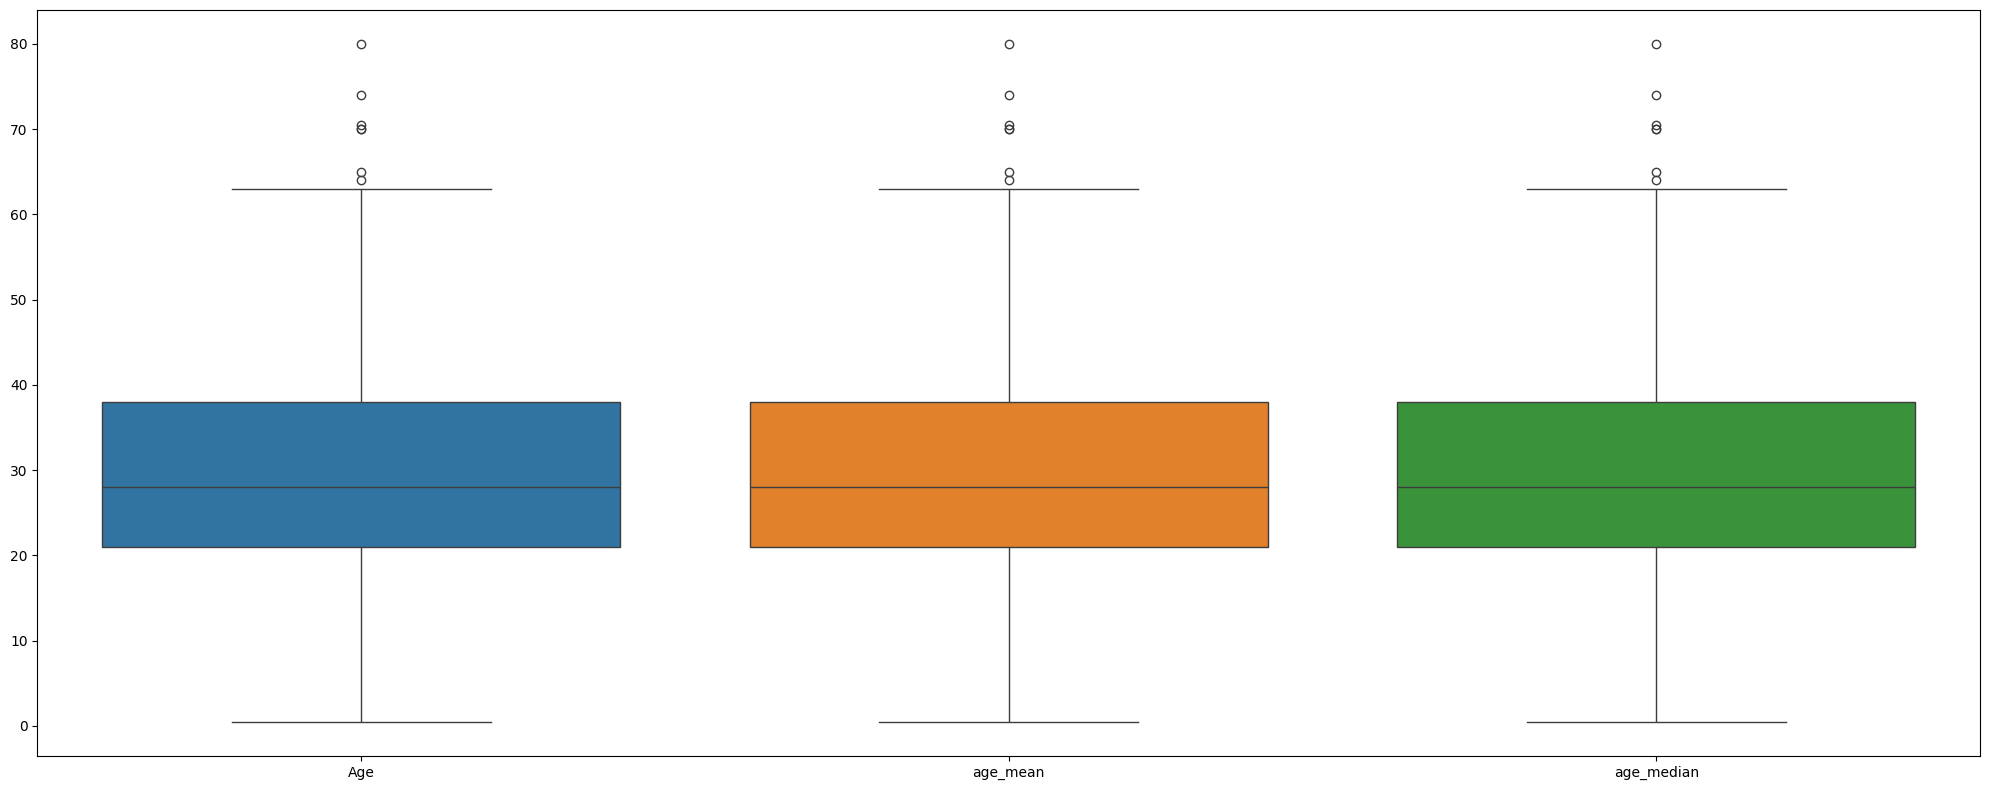

In [18]:
plt.figure(figsize=(20, 8))
sns.boxplot(x_train[['Age', 'age_mean', 'age_median']])

plt.tight_layout()
plt.show()

# as we can see here there is very less number of outliers after doing imputation by Sklearn, which is very less compared to imputation by pandas